Make new Product Recommendations

Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.

Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) ratings_Electronics_Ver3.tar.xzView in a new window (you may use winrar application to extract the .csv file)

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.


o The repository has several datasets. For this case study, please use the Electronics dataset.
o The host page has several pointers to scripts and other examples that can help with parsing the datasets.
o The data set consists of:
● 7,824,482 Ratings (1-5) for Electronics products.
● Other metadata about products. Please see the description of the fields available on the web page cited above.


o For convenience of future use, parse the raw data file (using Python, for example) and extract the following fields: 'product/productId' as prod_id, 'product/title' as prod_name, 'review/userId' as user id, 'review/score' as rating
o Save these to a tab separated file. Name this file as product_ratings.csv.

Steps -
1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.
8. Summarise your insights.

Mark Distributions -
Step - 1,2,3,8 - 5 marks each
Step - 4,5,6,7 - 10 marks each

## 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [296]:
#Import library
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity


import math, random, warnings
from time import time
from datetime import datetime
from collections import defaultdict

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-surprise recommender package
from surprise import SVD, KNNWithMeans
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.prediction_algorithms.baseline_only import BaselineOnly


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [284]:
#read file and rename columns
r_df=pd.read_csv('ratings_Electronics.csv',sep="," ,names= ['user_id','prod_id','rating','timestamp'])

In [285]:
r_df.head()

,user_id,prod_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [286]:
#data characteristics
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id      object
prod_id      object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [287]:
r_df.shape

(7824482, 4)

In [288]:
r_df.dtypes

user_id       object
prod_id       object
rating       float64
timestamp      int64
dtype: object

In [289]:
r_df['rating'].astype(np.float32,inplace=True)

0          5.0
1          5.0
2          1.0
3          3.0
4          1.0
5          5.0
6          2.0
7          5.0
8          5.0
9          5.0
10         5.0
11         5.0
12         1.0
13         5.0
14         1.0
15         4.0
16         3.0
17         2.0
18         2.0
19         4.0
20         5.0
21         4.0
22         5.0
23         1.0
24         4.0
25         1.0
26         4.0
27         2.0
28         1.0
29         5.0
          ... 
7824452    5.0
7824453    5.0
7824454    5.0
7824455    5.0
7824456    5.0
7824457    5.0
7824458    1.0
7824459    4.0
7824460    5.0
7824461    5.0
7824462    5.0
7824463    5.0
7824464    1.0
7824465    5.0
7824466    4.0
7824467    3.0
7824468    5.0
7824469    4.0
7824470    2.0
7824471    5.0
7824472    5.0
7824473    1.0
7824474    5.0
7824475    3.0
7824476    5.0
7824477    5.0
7824478    5.0
7824479    4.0
7824480    4.0
7824481    5.0
Name: rating, Length: 7824482, dtype: float32

In [290]:
r_df.dtypes

user_id       object
prod_id       object
rating       float64
timestamp      int64
dtype: object

In [291]:
# Null Values = None found
#r_df.isnull().sum() - alternate way
r_df.isnull().values.any()
r_df.isnull().sum().sum()
r_df.isna().values.any()
r_df.isna().sum().sum()

False

0

False

0

In [292]:
r_df[r_df=='?'].sum()

C:\Anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


user_id      0.0
prod_id      0.0
rating       0.0
timestamp    0.0
dtype: float64

In [293]:
# Check the count of unique user and product data
unique_original = (r_df.user_id.nunique(), r_df.prod_id.nunique())
print('Count of unique Users    :', unique_original[0])
print('Count of unique Products :', unique_original[1])
#ALternate
len(r_df.prod_id.unique())
len(r_df.user_id.unique())
len(r_df.rating.unique())

Count of unique Users    : 4201696
Count of unique Products : 476002


476002

4201696

5

### Observations

The dataset consist of 7824482 rows and 4 columns
There are NO nullvalues or ? value in the dataset
Unique 

In [294]:
#Check Duplicates
r_df.drop_duplicates(subset=['user_id','prod_id','rating'],inplace=True)

In [295]:
r_df.shape

(7824482, 4)

### No duplicates found

In [158]:
r_df['timestamp'] = r_df.timestamp.apply(lambda ts: datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

In [159]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id      object
prod_id      object
rating       float64
timestamp    object
dtypes: float64(1), object(3)
memory usage: 298.5+ MB


In [160]:
# Convert the datatype to datetime
r_df['timestamp'] = pd.to_datetime(r_df['timestamp'])
r_df.head()
r_df.info()

,user_id,prod_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id      object
prod_id      object
rating       float64
timestamp    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 298.5+ MB


In [161]:
#date range
r_df.timestamp.min()
r_df.timestamp.max()

Timestamp('1998-12-04 00:00:00')

Timestamp('2014-07-23 00:00:00')

In [162]:
#day range 
r_df.timestamp.max()-r_df.timestamp.min()

Timedelta('5710 days 00:00:00')

In [163]:
#Visualization
#r_df.hist(column=[ 'rating','timestamp']).groupby(r_df['timestamp'].dt.year).count()
r_df_y=r_df['rating'].groupby(r_df['timestamp'].dt.year).count()
r_df_y

timestamp
1998          4
1999       1212
2000       9214
2001      14753
2002      18648
2003      23117
2004      31245
2005      56311
2006      86659
2007     193430
2008     238521
2009     325380
2010     475626
2011     783503
2012    1231673
2013    2626582
2014    1708604
Name: rating, dtype: int64

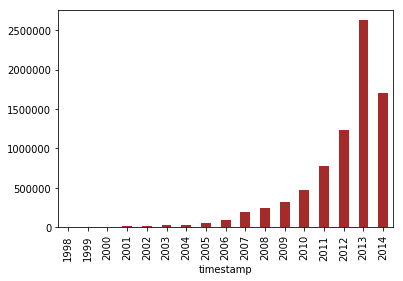

In [164]:
r_df_y.plot(kind='bar', color='brown')
xlabel='year'


In [165]:
r_df_y=r_df['rating'].groupby(r_df['user_id']).count()
r_df_y

user_id
A00000262KYZUE4J55XGL     1
A000063614T1OE0BUSKUT     2
A00009182QVLSWIGHLS1B     1
A00009661LC9LQPGKJ24G     1
A00010809P09NUU6ZP6H      1
A00014061C2IZNE0YEILY     1
A000145014WOTZJ5NSKOR     1
A00015222LZ55IJSVL5IX     1
A00015228CUPGPF957DS      1
A0001528BGUBOEVR6T5U      4
A00018041RRVMCICCAP79     2
A000186437REL8X2RW8UW     1
A000187635I595IAVSQLH     2
A00019466UY2KR1IPXQN      1
A0002012T7HVDB2EF4RH      1
A0002032ZFQKDVHYKGWR      1
A0002550196XWX0PEOZND     1
A00027081JC8NE8X6TD5      1
A00027561NC7JTXEP3EOD     1
A00028781NF0U7YEN9U19     1
A00029263J863WSR0TDRS     1
A000294826HEMAY5L3K1H     1
A00029825UMZ6N0ETLHY      1
A00033481VZEEGYXEN32T     3
A00037441I8XOQJSUWCAG     3
A00038802J7X43YTW44TD     2
A000428226SAAAIBK8I36     1
A0004478EF5NFPHLGCWG      1
A00045341JXVKNK93M6JE     1
A00059641RDIAMDC7IJRZ     1
                         ..
AZZYJH0XNZ896             1
AZZYK2BT6EU8V             2
AZZYKX2KZ0Q82             1
AZZYMQZHES0KT             1
AZZYO4XQYE89

### Observation
data is collected for 5710 days,i.e, between 1998 to 2014
ratings are increasing every year except for 2014
timestamp consist of only YYYY-DD-MM format, no HH:MM:SS data is provided

In [166]:
#Drop timestamp
r_df.drop(labels='timestamp', axis=1, inplace=True)
r_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
user_id    object
prod_id    object
rating     float64
dtypes: float64(1), object(2)
memory usage: 238.8+ MB


In [167]:
r_df.columns

Index(['user_id', 'prod_id', 'rating'], dtype='object')

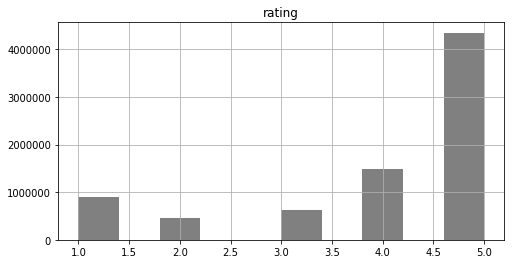

In [168]:
histogram_player = r_df.hist(column=[ 'prod_id', 'rating'],figsize=(8,4), bins=10, color='grey')

In [169]:
# count of users n product by ratings
r_df.groupby(['rating'])['prod_id'].nunique()

rating
1.0    176283
2.0    123419
3.0    152827
4.0    223845
5.0    358458
Name: prod_id, dtype: int64

### Observation
    4347541 users have given 5 rating, which denotes that more than 55% of users are happy with products
    users also have rated products @ 4, which indicates close to 75% of users ( rating 4& 5) are happy with products  


## 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings)



In [170]:
# calculate sparsity
from numpy import array
from numpy import count_nonzero

In [171]:
r_df.size

23473446

In [172]:
count_nonzero(r_df)

23473446

In [173]:
# calculate sparsity
sparsity = 1.0 - count_nonzero(r_df) / r_df.size
print(sparsity)

0.0


### Observation
    no zero values are found,
    we can look for products/users which are long tailed

# Find the top 10 users based on ratings
most_rated = r_df.user_id.value_counts().rename_axis('user_id').reset_index(name='user_rating_index')
most_rated = r_df.groupby('user_id').size().sort_values(ascending=False)
least_rated = r_df.groupby('user_id').size().sort_values(ascending=True)
most_rated.head(5)
least_rated.head(5)


In [174]:
# Find the top 10 users based on ratings
most_rated = r_df.user_id.value_counts().reset_index().rename_axis('user_id')
most_rated = r_df.groupby('user_id').size().sort_values(ascending=False)
least_rated = r_df.groupby('user_id').size().sort_values(ascending=True)
most_rated.head(5)
least_rated.head(5)

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
dtype: int64

user_id
A00000262KYZUE4J55XGL    1
A3AAXWDYVQ93SZ           1
A3AAXWHVCN6VOG           1
A3AAXX0N47FFP            1
A3AAXY0TMZS72Y           1
dtype: int64

In [175]:
r_df.count()

user_id    7824482
prod_id    7824482
rating     7824482
dtype: int64

In [176]:
r_df.user_id.nunique()
r_df.prod_id.nunique()
r_df.rating.nunique()

4201696

476002

5

In [177]:
most_rated.dtype

dtype('int64')

In [79]:
# create dense matrix

In [178]:
from scipy.sparse import csr_matrix

In [179]:
# Find the density of the rating matrix
print('Total observed ratings in the dataset  :', len(r_df))
possible_num_of_ratings = r_df.user_id.nunique() * r_df.prod_id.nunique()
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(r_df) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.5f}%'.format(density))

Total observed ratings in the dataset  : 7824482
Total ratings possible for the dataset : 2000015699392
Density of the dataset                 : 0.00039%


In [180]:
r_df.shape

(7824482, 3)

In [181]:
r_df.user_id.nunique()
r_df.prod_id.nunique()
r_df.rating.nunique()

4201696

476002

5

In [182]:
most_rated.shape
most_rated.count()

(4201696,)

4201696

In [183]:
most_rated[most_rated>= 50]

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A31N0XY2UTB25C    227
                 ... 
A319Y83RT0MRVR     50
A21S26XYPGXJZX     50
A37PV5GMP2ILJC     50
AY4EXFOO43C3S      50
A1EOTB1WHLSW6G     50
A1C5TCCR2IGKBU     50
ANEDXRFDZDL18      50
A274X54O9CN2SR     50
A1USYP4AXF5I1D     50
A28CCQNXWV6WA2     50
ANEXFROORI6F6      50
A11KQADBYE0UZL     50
A2AFTRU43PY9P5     50
A1D27BCSYV7VWH     50
A3

In [184]:
r_df.user_id.nunique()
r_df.prod_id.nunique()
r_df.rating.nunique() 

4201696

476002

5

In [185]:
r_df.count()

user_id    7824482
prod_id    7824482
rating     7824482
dtype: int64

In [186]:
r_df.columns

Index(['user_id', 'prod_id', 'rating'], dtype='object')

In [187]:
type(r_df)
r_df.head()

pandas.core.frame.DataFrame

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [188]:
# Drop the users who have rated less than 50 products
#r_df=r_df[r_df.user_id.isin(most_rated[most_rated>= 50])]

most_rated=r_df['user_id'].value_counts()
r_df=r_df[r_df['user_id'].isin(most_rated[most_rated>=50].index)]

print('# unique USERS who have rated 50 or more products :', r_df.user_id.nunique())
print('# unique USERS dropped      :', unique_original[0] - r_df.user_id.nunique())
print('# unique ITEMS remaining    :', r_df.prod_id.nunique())
print('# unique ITEMS dropped      :', unique_original[1] - r_df.prod_id.nunique())
print('\nFinal length of the dataset :', len(r_df))

# unique USERS who have rated 50 or more products : 1540
# unique USERS dropped      : 4200156
# unique ITEMS remaining    : 48190
# unique ITEMS dropped      : 427812

Final length of the dataset : 125871


In [189]:
# Find the density of the final matrix
final_ratings_matrix = r_df.pivot(index='user_id', columns='prod_id', values='rating').fillna(0)
print('Shape of final_ratings_matrix          :', final_ratings_matrix.shape)
print('Total observed ratings in the dataset  :', len(r_df))
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(r_df) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.2f}%'.format(density))

Shape of final_ratings_matrix          : (1540, 48190)
Total observed ratings in the dataset  : 125871
Total ratings possible for the dataset : 74212600
Density of the dataset                 : 0.17%


In [190]:
# Calculate the increase in density
print('The density of the user-item matrix increased by {:4.2f}%'.format((0.17-0.00039)/0.00039))

The density of the user-item matrix increased by 434.90%


## 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [92]:
# Divide the dataset in 70:30 ratio
trainset, testset = model_selection.train_test_split(r_df, test_size=0.3, random_state=5)
trainset.head()
testset.head()

,user_id,prod_id,rating
5815696,A197T2N6RU7K56,B007N6OED8,5.0
412740,A3HR0ZZOFKQ97N,B0001Y7UAI,5.0
444340,AGHZXQL9F94T9,B0002A6YVC,2.0
3481712,A2XJMQ2COPGWJH,B003NSBF32,2.0
4580022,A2D1LPEUCTNT8X,B004YKKT26,4.0


,user_id,prod_id,rating
4930282,A2UOHALGF2X77Q,B005G81E9M,3.0
3333831,A27M75LRSJ788H,B003FG6IV6,5.0
7490425,A35W3JQYP0M655,B00E3FHXYO,5.0
679608,A1FR68QH6Z4YZM,B0009R3N9E,5.0
583942,A25FL6VLD7S23S,B00079Q5DK,2.0


In [93]:
print('Shape of the training set  :',trainset.shape)
print('Shape of the test set  :',testset.shape)

Shape of the training set  : (88109, 3)
Shape of the test set  : (37762, 3)


Text(0.5, 1.0, 'Training dataset wise ratings')

Text(0.5, 1.0, 'Test dataset wise ratings')

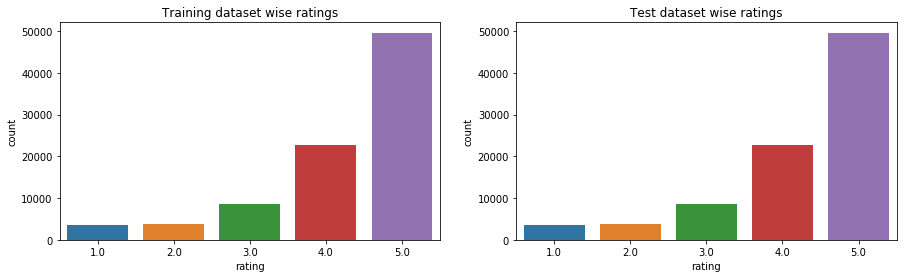

In [94]:
#Rating distribution check
fig, axes = plt.subplots(1, 2, figsize=(15,4))
axes[0].set_title('Training dataset wise ratings')
sns.countplot('rating', data=trainset, ax=axes[0])
axes[1].set_title('Test dataset wise ratings')
sns.countplot('rating', data=trainset, ax=axes[1])

### Observation
training set  : 88109 || test set  : 37762
ratings seem to be similarly distributed between test n training set

## 4. Build Popularity Recommender model.

### Model1 - COUNT of User ID rating for each product
The score for each product in this method is calculated as the sum of the number of users rated.

In [95]:
# Create method to recommend products based on popularity
def recommend_popular(r_df, top_n, user_id=None):
    # Generate a recommendation rank based upon score 
    r_df['ranking'] = r_df['score'].rank(ascending=0, method='first') 
    recommendations = r_df.sort_values(['score', 'prod_id'], ascending=[0,1])
    
    # Add User_id column for which the recommendations are being generated 
    if user_id:
        recommendations.insert(0,'user_id',user_id)
    
    # Get the top N recommendations 
    return recommendations.head(top_n)

In [96]:
#Count of user_id for each unique product as recommendation score 
product_grp = r_df.groupby(['prod_id']).agg({'user_id': 'count'}).reset_index()
product_grp.rename(columns={'user_id': 'score'}, inplace=True)
product_grp.head()

,prod_id,score
0,0594451647,1
1,0594481813,1
2,0970407998,2
3,0972683275,4
4,1400501466,6


In [97]:
# Find recommendation for top 5 products
recommend_popular(product_grp, 5)

,prod_id,score,ranking
39003,B0088CJT4U,206,1.0
24827,B003ES5ZUU,184,2.0
11078,B000N99BBC,167,3.0
38250,B007WTAJTO,164,4.0
38615,B00829TIEK,149,5.0


### Model2 - AVERAGE of ratings for unique product as recommended score
The score for each product in this method is calculated as the average of the ratings recieved. 
This method is better than method 1.

In [98]:
#Count of user_id for each unique product as recommendation score 
product_grp = r_df.groupby(['prod_id']).agg({'rating': 'mean'}).reset_index()
product_grp.rename(columns={'rating': 'score'}, inplace=True)
product_grp.head()

,prod_id,score
0,0594451647,5.000000
1,0594481813,3.000000
2,0970407998,2.500000
3,0972683275,4.750000
4,1400501466,3.333333


In [99]:
# Find recommendation for top 5 products
recommend_popular(product_grp, 5)

,prod_id,score,ranking
0,0594451647,5.0,1.0
5,1400501520,5.0,2.0
12,1400699169,5.0,3.0
13,1685560148,5.0,4.0
14,3744295508,5.0,5.0


# Model3 - SUM of ratings for unique product as recommended score
The score for each product in this method is calculated as the sum of all ratings. This is practically the best approach to determine the popularity of an item considering only the users ratings are given. This is also preferred over avg (method 2) as average of one 5 star rating is exactly same as the average of more than one 5 star ratings, but the product with more 5 star ratings would be considered as the most popular.

In [100]:
#Count of user_id for each unique product as recommendation score 
product_grp = r_df.groupby(['prod_id']).agg({'rating': 'sum'}).reset_index()
product_grp.rename(columns={'rating': 'score'}, inplace=True)
product_grp.head()

,prod_id,score
0,0594451647,5.0
1,0594481813,3.0
2,0970407998,5.0
3,0972683275,19.0
4,1400501466,20.0


In [101]:
# Find recommendation for top 5 products
recommend_popular(product_grp, 5)

,prod_id,score,ranking
24827,B003ES5ZUU,895.0,1.0
39003,B0088CJT4U,869.0,2.0
11078,B000N99BBC,797.0,3.0
38250,B007WTAJTO,771.0,4.0
38615,B00829TIEK,661.0,5.0


In [102]:
# Find recommendation for couple of users
find_recom = {'A2Y4H3PXB07WQI': 3, 
              'A341HCMGNZCBIT': 5, 
              'AOVTLYTHVDNUX': 7}   # This list is user, top_n recommendation dict.
for user in find_recom:
    print("Top %d recommendations for the user_id: %s" %(find_recom[user],user))
    recommend_popular(product_grp,find_recom[user],user)
    print("\n")

Top 3 recommendations for the user_id: A2Y4H3PXB07WQI


,user_id,prod_id,score,ranking
24827,A2Y4H3PXB07WQI,B003ES5ZUU,895.0,1.0
39003,A2Y4H3PXB07WQI,B0088CJT4U,869.0,2.0
11078,A2Y4H3PXB07WQI,B000N99BBC,797.0,3.0




Top 5 recommendations for the user_id: A341HCMGNZCBIT


,user_id,prod_id,score,ranking
24827,A341HCMGNZCBIT,B003ES5ZUU,895.0,1.0
39003,A341HCMGNZCBIT,B0088CJT4U,869.0,2.0
11078,A341HCMGNZCBIT,B000N99BBC,797.0,3.0
38250,A341HCMGNZCBIT,B007WTAJTO,771.0,4.0
38615,A341HCMGNZCBIT,B00829TIEK,661.0,5.0




Top 7 recommendations for the user_id: AOVTLYTHVDNUX


,user_id,prod_id,score,ranking
24827,AOVTLYTHVDNUX,B003ES5ZUU,895.0,1.0
39003,AOVTLYTHVDNUX,B0088CJT4U,869.0,2.0
11078,AOVTLYTHVDNUX,B000N99BBC,797.0,3.0
38250,AOVTLYTHVDNUX,B007WTAJTO,771.0,4.0
38615,AOVTLYTHVDNUX,B00829TIEK,661.0,5.0
38611,AOVTLYTHVDNUX,B00829THK0,605.0,6.0
39338,AOVTLYTHVDNUX,B008DWCRQW,561.0,7.0


In [110]:
# Create the User-Item sparse matrix
user_item = r_df.pivot(index='user_id', columns='prod_id', values='rating').fillna(0)
print('Shape of User-Item sparse matrix:', user_item.shape)
user_item.head()

Shape of User-Item sparse matrix: (1540, 48190)


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# Create the Item-User sparse matrix
item_user = r_df.pivot(index='prod_id', columns='user_id', values='rating').fillna(0)
print('Shape of Item-User sparse matrix:', item_user.shape)
item_user.head()

Shape of Item-User sparse matrix: (48190, 1540)


user_id,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
prod_id,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# Calculate the user-user similarity
user_similarity = cosine_similarity(user_item)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity,index=user_item.index, columns=user_item.index)
user_similarity_df.head()

user_id,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.000000,0.010959,0.000000,0.014581,0.026016,0.000000,0.023949,0.033777,0.011733,0.020193,...,0.024818,0.000000,0.000000,0.025311,0.036252,0.000000,0.0,0.038111,0.015687,0.014340
A100WO06OQR8BQ,0.010959,0.000000,0.013124,0.015884,0.009447,0.010240,0.013045,0.019625,0.017383,0.002200,...,0.015020,0.003014,0.012131,0.000000,0.021452,0.018354,0.0,0.016607,0.000000,0.003124
A105S56ODHGJEK,0.000000,0.013124,0.000000,0.000000,0.021635,0.065075,0.000000,0.000000,0.031614,0.000000,...,0.000000,0.000000,0.028166,0.000000,0.010719,0.000000,0.0,0.003651,0.023483,0.000000
A105TOJ6LTVMBG,0.014581,0.015884,0.000000,0.000000,0.000000,0.000000,0.017355,0.003264,0.000000,0.000000,...,0.035970,0.000000,0.011131,0.000000,0.016217,0.019535,0.0,0.040212,0.000000,0.000000
A10AFVU66A79Y1,0.026016,0.009447,0.021635,0.000000,0.000000,0.021100,0.000000,0.000000,0.000000,0.014505,...,0.000000,0.000000,0.015447,0.036363,0.050152,0.000000,0.0,0.000000,0.000000,0.000000


In [113]:
# Calculate the item-item similarity
item_similarity = cosine_similarity(item_user)
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user.index, columns=item_user.index)
item_similarity_df.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
prod_id,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.260771,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.539164,0.421016,0.0,0.000000,0.523066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
# Method to find top N neighbors
def find_n_neighbors(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(axis=1, func=lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,
                                                   index=['top{}'.format(i) for i in range(1, n+1)]))
    return df

In [115]:
# Find 10 neighbors of each user
user_10_neighbors = find_n_neighbors(user_similarity_df, 10)
user_10_neighbors.head(10)

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
user_id,,,,,,,,,,
A100UD67AHFODS,A2FZQF0MH29VYN,A11FX8HL2ANK6T,A3CG93783LP0FO,A2NOW4U7W3F7RI,A2LB4FLRZG6CUV,A2DG63DN704LOI,AT53ZTTO707MB,A2XX2A4OJCDNLZ,A33XMCG1UFDSY2,A2YW6XOID7GV6G
A100WO06OQR8BQ,A3963R7EPE3A7E,A30UP2KKD5IQEP,A2Y3WWPUKIJ59I,A298GL2D0BHGKZ,A1CST2WUA32GP0,A15XI2BEGGFEOW,A3D822N1K2IAQD,A2L4ZGN7GZJ95T,A18S2VGUH9SCV5,AXP8GO5Q3AXSA
A105S56ODHGJEK,A17UNMURMLX0ZE,ABMNX856X89CS,ANTN61S4L7WG9,A2LF16F0KX9L7P,A2UKE7GIVC7XFW,AJX9A4Q19UTJU,A2R1HUYHXV7H18,A3J3ZHGDUDPCFL,A1WXG10FJ353K0,A20L63B48RPSOH
A105TOJ6LTVMBG,A1TQBAHI3M4ZBQ,A10ZFE6YE0UHW8,A2XXBZPQT5EXHV,A1NZLRAZJGD99W,A1D27BCSYV7VWH,AVTJEWTCJ3PBE,AAK6SOEJY30YG,A2GKMXRLI7KLFP,A2VCXIAWCPQ13P,AKSFZ4G1AXYFC
A10AFVU66A79Y1,ACQYIC13JXAOI,A25QJBK33C4O0R,A2PMR2PIGWKCQ9,A4H4KYSM2KQ85,A2TVH2OBNXYXHV,A84FLVDK2R5JF,A2UOHALGF2X77Q,A24RCBRDXRXR0Y,A2IFKH3TJ10387,A3JLOIXFM75QNV
A10H24TDLK2VDP,ANTN61S4L7WG9,A2QRXQPHDMFCQV,A3V2EZ6MA32FF6,A3SP7T2PZ3HSDE,AO09RWV40IX78,A3J3ZHGDUDPCFL,A3QNQQKJTL76H0,A1RL1OTV8IJMVD,A19W47CXJJP1MI,A3LDLV1GWQJLEQ
A10NMELR4KX0J6,ARC5ASW9CUAGP,A1PS4OYWUB0VX,A3F7USIDJBR8WU,A3GX0FAMEXV6FB,A32HSNCNPRUMTR,A1L5TA5UQF7EWE,A3223W5IROMYTY,A1ZPUEHF4AES86,A17W0GMB0YY83M,A2HV76MYH7UL3S
A10O7THJ2O20AG,AWSK1ZAEU1KFL,A365PBEOWM7EI7,AZ8XSDMIX04VJ,AN9CP6J4JF91X,AJEOFP6ZWY0MK,A2HRHF83I3NDGT,A24P4E3RJ6AX94,A28621TSIR5EOG,A1VLE2SH9J8WYS,A2A4X545ERLS7H
A10PEXB6XAQ5XF,A267FU71Z01CIH,A1TR1R2QKWRSRA,A2MJ8OL2FYN7CW,A1CMD08Z49PGKQ,A2BLFCOPSMBOZ9,A2CWIYIETNBAK3,A1MCH5RXDOH87H,A28X0LT2100RL1,A1PI8VBCXXSGC7,AJX9A4Q19UTJU


In [221]:
# Find 10 neighbors of each item
item_10_neighbors = find_n_neighbors(item_similarity_df, 10)
item_10_neighbors.head(10)

MemoryError: 

In [199]:
def get_users_similar_products(user1, user2):
    common_products = r_df[r_df.user_id == user1].merge(
    r_df[r_df.user_id == user2],
    on = "prod_id",
    how = "inner" )
    return common_products[['rating_x', 'rating_y', 'prod_id']].head()

In [200]:
# Check the similarity of two users
get_users_similar_products('A100UD67AHFODS', 'A2FZQF0MH29VYN')

,rating_x,rating_y,prod_id
0,5.0,5.0,B0002KVQBA
1,3.0,4.0,B002HWRJY4
2,4.0,5.0,B0071BTJPI
3,5.0,5.0,B0097BEFYA
4,5.0,5.0,B00A83I8G2


In [216]:
# Method to predict the rating
def predict(r_df, similarity, type='user'):
    if type == 'user':
        mean_user_rating = r_df.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (r_df - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = r_df.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [217]:

# Predict the ratings for both UBCF and IBCF
st=time()
user_prediction = predict(user_item, user_similarity, type='user')
user_prediction = pd.DataFrame(user_prediction, index=user_item.index, columns=user_item.columns)
user_prediction.head()



prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.017154,0.002092,0.005845,0.012278,0.014030,0.006465,0.009676,0.002092,0.032189,0.005590,...,0.002092,0.014658,0.008514,0.018092,0.012563,0.021400,0.002092,0.038177,0.024648,0.002092
A100WO06OQR8BQ,0.005774,0.001983,0.003865,0.021469,0.009333,0.005914,0.018734,0.001983,0.010705,0.005128,...,0.001983,0.018813,0.002330,0.008683,0.005423,0.001983,0.009109,0.014147,0.006278,0.004292
A105S56ODHGJEK,-0.002657,-0.002657,-0.001407,0.003031,0.003396,-0.002657,-0.000892,-0.000457,0.002892,-0.001567,...,-0.002657,0.005638,-0.002657,0.000028,0.004927,-0.002657,-0.002657,0.020487,-0.002657,0.001107
A105TOJ6LTVMBG,-0.001967,0.001565,0.000717,0.014854,0.005874,-0.001967,-0.001967,-0.001967,0.011245,-0.001967,...,-0.001967,-0.001967,-0.001967,-0.001967,0.000626,0.008226,-0.001967,0.010419,0.003234,-0.001967
A10AFVU66A79Y1,-0.002555,-0.002555,0.005432,0.010272,0.010011,0.003465,0.006450,-0.002416,0.004098,0.003900,...,-0.002555,0.012187,0.004077,0.000329,-0.000589,-0.002555,-0.002555,0.012920,0.004188,-0.002555


In [222]:
item_prediction = predict(user_item, item_similarity, type='item')
# Commenting out following 2 lines as it throws MemoryError due to the high sparsity
#item_prediction = pd.DataFrame(item_prediction, index=item_user.index, columns=item_user.columns)
#item_prediction.head()
#print('Time taken %.2fs to find out the user and item prediction' % (time()-st))

MemoryError: 

In [204]:

# Method to Recommend the items with the highest predicted ratings
def recommend_items(user_id, orig_df, preds_df, top_n):
    # Get and sort the user's ratings
    sorted_user_ratings = orig_df.loc[user_id].sort_values(ascending=False) #sorted_user_ratings
    sorted_user_predictions = preds_df.loc[user_id].sort_values(ascending=False) #sorted_user_predictions

    # Prepare recommendations
    recommedations = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    recommedations.index.name = 'Recommended Items'
    recommedations.columns = ['user_ratings', 'user_predictions']
    
    # Take the products which user has NOT rated
    recommedations = recommedations.loc[recommedations.user_ratings == 0] 
    recommedations = recommedations.sort_values('user_predictions', ascending=False)
    return recommedations.head(top_n)

In [205]:
# Find recommendation for couple of users using UBCF
find_recom = {'A100UD67AHFODS': 6, 
              'A100WO06OQR8BQ': 3, 
              'A105S56ODHGJEK': 8}   # This list is user, top_n recommendation dict.
for user in find_recom:
    print("Top %d recommendations for the user_id: %s" %(find_recom[user],user))
    recommend_items(user, user_item, user_prediction, find_recom[user])
    print("\n")

Top 6 recommendations for the user_id: A100UD67AHFODS


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B003ES5ZUU,0.0,0.873249
B007WTAJTO,0.0,0.684484
B0088CJT4U,0.0,0.509175
B00G4UQ6U8,0.0,0.485093
B002V88HFE,0.0,0.463316
B00829THK0,0.0,0.462261




Top 3 recommendations for the user_id: A100WO06OQR8BQ


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B000N99BBC,0.0,0.883033
B00829TIEK,0.0,0.749101
B004CLYEDC,0.0,0.729534




Top 8 recommendations for the user_id: A105S56ODHGJEK


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B0088CJT4U,0.0,1.343072
B00829THK0,0.0,0.884969
B002R5AM7C,0.0,0.844498
B004CLYEDC,0.0,0.836300
B004CLYEFK,0.0,0.792145
B004T9RR6I,0.0,0.661622
B003ES5ZUU,0.0,0.615857
B00834SJNA,0.0,0.606862


In [125]:
# Trying out different latent factors
svd_list = [svds(user_item, k=k) for k in [100,250,500]]
pred_list = [pd.DataFrame(np.dot(np.dot(svd[0], np.diag(svd[1])), svd[2]), 
                          index=user_item.index, 
                          columns=user_item.columns) for svd in svd_list]
RMSE_list = [round((((user_item.mean() - pred.mean()) ** 2).mean() ** 0.5), 3) for pred in pred_list]
RMSE_list

[0.002, 0.002, 0.001]

In [126]:
# Singular Value Decomposition
U, sigma, Vt = svds(user_item, k=50)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [127]:
# Print the shape of the decomposed matrices
print('Shape of the Left Singular matrix          :', U.shape)
print('Shape of the Latent Factor Diagonal matrix :', sigma.shape)
print('Shape of the Right Singular matrix         :', Vt.shape)
U.shape, sigma.shape, Vt.shape

Shape of the Left Singular matrix          : (1540, 50)
Shape of the Latent Factor Diagonal matrix : (50, 50)
Shape of the Right Singular matrix         : (50, 48190)


((1540, 50), (50, 50), (50, 48190))

In [128]:
# Predicted ratings
svd_prediction = pd.DataFrame(np.dot(np.dot(U, sigma), Vt), index=user_item.index, columns=user_item.columns)
svd_prediction.head()

prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
A100WO06OQR8BQ,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
A105S56ODHGJEK,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
A105TOJ6LTVMBG,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
A10AFVU66A79Y1,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [129]:
# Find recommendation for couple of users
find_recom = {'A100UD67AHFODS': 6, 
              'A100WO06OQR8BQ': 3, 
              'A105S56ODHGJEK': 8}   # This list is user, top_n recommendation dict.
for user in find_recom:
    print("Top %d recommendations for the userId: %s" %(find_recom[user],user))
    recommend_items(user, user_item, svd_prediction, find_recom[user])
    print("\n")

Top 6 recommendations for the userId: A100UD67AHFODS


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B0019EHU8G,0.0,1.407411
B003ES5ZUU,0.0,1.097482
B007OY5V68,0.0,0.987353
B000JMJWV2,0.0,0.946122
B009SYZ8OC,0.0,0.847875
B00DTZYHX4,0.0,0.745124




Top 3 recommendations for the userId: A100WO06OQR8BQ


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B000N99BBC,0.0,1.825135
B004CLYEDC,0.0,1.250059
B001TH7GSW,0.0,1.006211


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':




Top 8 recommendations for the userId: A105S56ODHGJEK


,user_ratings,user_predictions
Recommended Items,,
B0088CJT4U,0.0,1.557864
B004T9RR6I,0.0,1.195031
B00BOHNYU6,0.0,1.032649
B00ARB5FLQ,0.0,0.988891
B00829THK0,0.0,0.912461
B002R5AM7C,0.0,0.885421
B009HQCAPQ,0.0,0.825770
B0097CZHAU,0.0,0.806825


In [206]:
# Method to calculate RMSE for different model
def calculate_rmse(orig_df, preds_df):
    rmse_df = pd.concat([orig_df.mean(), preds_df.mean()], axis=1)
    rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
    RMSE = round(np.sqrt(((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean()), 5)
    print('\nRMSE for this recommender model = {}\n'.format(RMSE))
    return rmse_df.head()

In [207]:
#Evaluation of User Based CF
calculate_rmse(user_item, user_prediction)


RMSE for this recommender model = 0.00516



,Avg_actual_ratings,Avg_predicted_ratings
prod_id,,
0594451647,0.003247,0.002048
0594481813,0.001948,0.001766
0970407998,0.003247,0.002743
0972683275,0.012338,0.012088
1400501466,0.012987,0.008534


In [223]:
# Evaluation of Item Based CF
calculate_rmse(user_item, item_prediction)
#Memory issue

NameError: name 'item_prediction' is not defined

In [224]:
#Evaluation of Matrix Factorization based CF
calculate_rmse(user_item, svd_prediction)


RMSE for this recommender model = 0.00275



,Avg_actual_ratings,Avg_predicted_ratings
prod_id,,
0594451647,0.003247,0.001953
0594481813,0.001948,0.002875
0970407998,0.003247,0.003355
0972683275,0.012338,0.010343
1400501466,0.012987,0.004871


In [225]:
# Create a list of users
users = ['A100UD67AHFODS','A100WO06OQR8BQ']
top_k = 5

# UBCF Recommendation
print('User Based Collaborative Filtering (UBCF)')
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    recommend_items(user, user_item, user_prediction, top_k)
    print("\n")

User Based Collaborative Filtering (UBCF)
Top 5 recommendations for the userId: A100UD67AHFODS


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B003ES5ZUU,0.0,0.873249
B007WTAJTO,0.0,0.684484
B0088CJT4U,0.0,0.509175
B00G4UQ6U8,0.0,0.485093
B002V88HFE,0.0,0.463316




Top 5 recommendations for the userId: A100WO06OQR8BQ


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B000N99BBC,0.0,0.883033
B00829TIEK,0.0,0.749101
B004CLYEDC,0.0,0.729534
B00829THK0,0.0,0.652739
B004CLYEFK,0.0,0.573304


In [226]:
# IBCF Recommendation
print('Item Based Collaborative Filtering (IBCF)')
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    recommend_items(user, user_item, item_prediction, top_k)
    print("\n")

Item Based Collaborative Filtering (IBCF)
Top 5 recommendations for the userId: A100UD67AHFODS


NameError: name 'item_prediction' is not defined

In [227]:
# SVD Recommendation
print('Matrix Factorization based Collaborative Filtering (SVD)')
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    recommend_items(user, user_item, svd_prediction, top_k)
    print("\n")

Matrix Factorization based Collaborative Filtering (SVD)
Top 5 recommendations for the userId: A100UD67AHFODS


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B0019EHU8G,0.0,1.407411
B003ES5ZUU,0.0,1.097482
B007OY5V68,0.0,0.987353
B000JMJWV2,0.0,0.946122
B009SYZ8OC,0.0,0.847875




Top 5 recommendations for the userId: A100WO06OQR8BQ


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,user_ratings,user_predictions
Recommended Items,,
B000N99BBC,0.0,1.825135
B004CLYEDC,0.0,1.250059
B001TH7GSW,0.0,1.006211
B00834SJSK,0.0,0.947728
B00AQRUW4Q,0.0,0.757301


# using SURPRISE package

In [229]:
# Set the rating scale
reader = Reader(rating_scale=(1, 5))

# Load data from the rattings data frame into surprise DataFolds
ratings_surp = Dataset.load_from_df(r_df, reader)

# Check the type of the loaded data
type(ratings_surp)

surprise.dataset.DatasetAutoFolds

In [230]:
# Divide the dataset in 70:30 ratio
trainset, testset = train_test_split(ratings_surp, test_size=0.3, random_state=123)

# Check the datatype of train and test set
type(trainset)

surprise.trainset.Trainset

In [231]:
#Baseline estimates-Hyperparameter Tuning
st = time()
grid_param = {'bsl_options': {'method': ['als'],
                             'n_epochs': random.sample(range(10, 20), 3),
                             'reg_u': random.sample(range(10, 30), 3),
                             'reg_i': random.sample(range(10, 30), 3)}
             }

gs = GridSearchCV(algo_class=BaselineOnly, param_grid=grid_param, measures=['RMSE', 'MAE'], cv=5, n_jobs = -1)
gs.fit(ratings_surp)
print(gs.best_score['rmse'], gs.best_params['rmse'])
print('Time taken %.2fs to tune the best hyper-parameter for Support Vector classifier' % (time()-st))

0.9813981074129948 {'bsl_options': {'method': 'als', 'n_epochs': 14, 'reg_u': 19, 'reg_i': 14}}
Time taken 537.46s to tune the best hyper-parameter for Support Vector classifier


In [232]:
# Evaluate the Baseline Estimate model
algo = BaselineOnly(bsl_options=gs.best_params['rmse']['bsl_options'])
algo.fit(trainset)
predictions = algo.test(testset)
print('RMSE of Baseline Estimate is:', accuracy.rmse(predictions, verbose=False))

Estimating biases using als...


RMSE of Baseline Estimate is: 0.991994612342033


In [233]:
# Convert the predictions into pandas dataframe
baseline_prediction = pd.DataFrame(predictions)
baseline_prediction.head()

,uid,iid,r_ui,est,details
0,A34C9AFFZOI45T,B000KMU0NU,5.0,4.722587,{'was_impossible': False}
1,AXYM52DNK6NDF,B004C5HM6Y,5.0,4.300573,{'was_impossible': False}
2,A1TQBAHI3M4ZBQ,B000ENRQ3M,3.0,4.590563,{'was_impossible': False}
3,A1TDR7Y90SVCHL,B0055OKHQS,5.0,4.298385,{'was_impossible': False}
4,A2IFKH3TJ10387,B005YR1PV2,4.0,4.115182,{'was_impossible': False}


In [234]:
# Sort in descending order
baseline_prediction.sort_values(by=['uid','est'], ascending=False, inplace=True)
# Predict for a particular user
algo.predict(uid='A100UD67AHFODS', iid='B0019EHU8G')

Prediction(uid='A100UD67AHFODS', iid='B0019EHU8G', r_ui=None, est=4.947802478453506, details={'was_impossible': False})

In [235]:
#Recommendation using Baseline Estimate
# Extract all null ratings in the original trainset (was_impossible=True)
testset_new = trainset.build_anti_testset()
len(testset_new)

58722951

In [236]:
# Create a list of users
users = ['A1TQBAHI3M4ZBQ','A1TDR7Y90SVCHL']
top_k = 5

# Baseline Recommendation
print('Baseline Estimate - SURPRISE')
top_k_recoms = baseline_prediction.groupby('uid').head(top_k).reset_index(drop=True)
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    top_k_recoms[top_k_recoms.uid.isin([user])]
    print("\n")

Baseline Estimate - SURPRISE
Top 5 recommendations for the userId: A1TQBAHI3M4ZBQ


,uid,iid,r_ui,est,details
6095,A1TQBAHI3M4ZBQ,B000CRFOMK,5.0,5.000000,{'was_impossible': False}
6096,A1TQBAHI3M4ZBQ,B005K7192G,5.0,4.963930,{'was_impossible': False}
6097,A1TQBAHI3M4ZBQ,B00006IW1X,5.0,4.833641,{'was_impossible': False}
6098,A1TQBAHI3M4ZBQ,B00BWF5U0M,4.0,4.790313,{'was_impossible': False}
6099,A1TQBAHI3M4ZBQ,B0011WCVPI,5.0,4.733592,{'was_impossible': False}




Top 5 recommendations for the userId: A1TDR7Y90SVCHL


,uid,iid,r_ui,est,details
6105,A1TDR7Y90SVCHL,B001TH7T2U,5.0,4.691184,{'was_impossible': False}
6106,A1TDR7Y90SVCHL,B002JQNXZC,5.0,4.490434,{'was_impossible': False}
6107,A1TDR7Y90SVCHL,B000HDJT4S,5.0,4.415268,{'was_impossible': False}
6108,A1TDR7Y90SVCHL,B0064Z71T8,1.0,4.391652,{'was_impossible': False}
6109,A1TDR7Y90SVCHL,B000JJSQ30,5.0,4.384630,{'was_impossible': False}


In [ ]:
## User Based Collaborative Filtering (UBCF)
## Use Pearson's correlation similarity with KNNWithMeans algorithm to achieve this recommendation.


In [237]:
# Instantiate and train the User based KNN algorithm
algo = KNNWithMeans(50, sim_options = { 'name':'pearson', 'user_based':True })
algo.fit(trainset)



Computing the pearson similarity matrix...
Done computing similarity matrix.


In [238]:
#Evaluate the model
predictions = algo.test(testset)
print('RMSE of User Based approach is:', accuracy.rmse(predictions, verbose=False))

RMSE of User Based approach is: 1.0567664621980295


In [239]:
# Convert the predictions into pandas dataframe
ubcf_prediction = pd.DataFrame(predictions)
ubcf_prediction.head()

,uid,iid,r_ui,est,details
0,A34C9AFFZOI45T,B000KMU0NU,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and/o..."
1,AXYM52DNK6NDF,B004C5HM6Y,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and/o..."
2,A1TQBAHI3M4ZBQ,B000ENRQ3M,3.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
3,A1TDR7Y90SVCHL,B0055OKHQS,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and/o..."
4,A2IFKH3TJ10387,B005YR1PV2,4.0,4.372881,"{'actual_k': 0, 'was_impossible': False}"


In [240]:
# Sort in descending order
ubcf_prediction.sort_values(by=['uid','est'], ascending=False, inplace=True)
# Predict for a particular user
algo.predict(uid='A100UD67AHFODS', iid='B0019EHU8G')

Prediction(uid='A100UD67AHFODS', iid='B0019EHU8G', r_ui=None, est=5, details={'actual_k': 2, 'was_impossible': False})

In [241]:
# Create a list of users
users = ['A1TQBAHI3M4ZBQ','A1TDR7Y90SVCHL']
top_k = 5

# Baseline Recommendation
print('User Based - SURPRISE')
top_k_recoms = ubcf_prediction.groupby('uid').head(top_k).reset_index(drop=True)
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    top_k_recoms[top_k_recoms.uid.isin([user])]
    print("\n")

User Based - SURPRISE
Top 5 recommendations for the userId: A1TQBAHI3M4ZBQ


,uid,iid,r_ui,est,details
6095,A1TQBAHI3M4ZBQ,B000ENRQ3M,3.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
6096,A1TQBAHI3M4ZBQ,B005K7192G,5.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
6097,A1TQBAHI3M4ZBQ,B00006IW1X,5.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
6098,A1TQBAHI3M4ZBQ,B000ETXOC8,5.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
6099,A1TQBAHI3M4ZBQ,B0015ZIS8K,5.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"




Top 5 recommendations for the userId: A1TDR7Y90SVCHL


,uid,iid,r_ui,est,details
6105,A1TDR7Y90SVCHL,B002ZCXJZE,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
6106,A1TDR7Y90SVCHL,B000HDJT4S,5.0,4.366197,"{'actual_k': 0, 'was_impossible': False}"
6107,A1TDR7Y90SVCHL,B003EO1H7E,4.0,4.366197,"{'actual_k': 0, 'was_impossible': False}"
6108,A1TDR7Y90SVCHL,B0064Z71T8,1.0,4.366197,"{'actual_k': 0, 'was_impossible': False}"
6109,A1TDR7Y90SVCHL,B000JJSQ30,5.0,4.366197,"{'actual_k': 0, 'was_impossible': False}"


In [242]:
## Recommendation using User Based approach
## using Pearson's correlation similarity with KNNWithMeans algorithm to achieve this recommendation.

In [255]:
from surprise import AlgoBase
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import PredictionImpossible

In [264]:
# Use smaller ratings dataset to avoid MemoryError (Dropped 80% data)
ratings_surp_sm = Dataset.load_from_df(r_df.sample(frac=0.8, random_state=25), Reader(rating_scale=(1, 5)))
trainset_sm, testset_sm = train_test_split(ratings_surp_sm, test_size=0.3, random_state=123)

In [272]:
# Instantiate and train the Item Based KNN algorithm
algo = KNNWithMeans(50, sim_options = { 'name':'pearson', 'user_based':False })
algo.fit(trainset_sm)

Computing the pearson similarity matrix...


MemoryError: 

In [274]:
predictions = algo.test(testset_sm)
print('RMSE of Item Based approach is:', accuracy.rmse(predictions, verbose=False))


AttributeError: 'KNNWithMeans' object has no attribute 'sim'

In [275]:
# Convert the predictions into pandas dataframe
ibcf_prediction = pd.DataFrame(predictions)
ibcf_prediction.head()

,uid,iid,r_ui,est,details
0,A34C9AFFZOI45T,B000KMU0NU,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and/o..."
1,AXYM52DNK6NDF,B004C5HM6Y,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and/o..."
2,A1TQBAHI3M4ZBQ,B000ENRQ3M,3.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
3,A1TDR7Y90SVCHL,B0055OKHQS,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and/o..."
4,A2IFKH3TJ10387,B005YR1PV2,4.0,4.372881,"{'actual_k': 0, 'was_impossible': False}"


In [276]:
# Sort in descending order
ibcf_prediction.sort_values(by=['uid','est'], ascending=False, inplace=True)
# Predict for a particular user
algo.predict(uid='A100UD67AHFODS', iid='B0019EHU8G')

AttributeError: 'KNNWithMeans' object has no attribute 'sim'

In [277]:
# Create a list of users
users = ['A1TQBAHI3M4ZBQ','A1TDR7Y90SVCHL']
top_k = 5

# Baseline Recommendation
print('Item Based - SURPRISE')
top_k_recoms = ibcf_prediction.groupby('uid').head(top_k).reset_index(drop=True)
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    top_k_recoms[top_k_recoms.uid.isin([user])]
    print("\n")

Item Based - SURPRISE
Top 5 recommendations for the userId: A1TQBAHI3M4ZBQ


,uid,iid,r_ui,est,details
6095,A1TQBAHI3M4ZBQ,B000ENRQ3M,3.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
6096,A1TQBAHI3M4ZBQ,B005K7192G,5.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
6097,A1TQBAHI3M4ZBQ,B00006IW1X,5.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
6098,A1TQBAHI3M4ZBQ,B000ETXOC8,5.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"
6099,A1TQBAHI3M4ZBQ,B0015ZIS8K,5.0,4.906977,"{'actual_k': 0, 'was_impossible': False}"




Top 5 recommendations for the userId: A1TDR7Y90SVCHL


,uid,iid,r_ui,est,details
6105,A1TDR7Y90SVCHL,B002ZCXJZE,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
6106,A1TDR7Y90SVCHL,B000HDJT4S,5.0,4.366197,"{'actual_k': 0, 'was_impossible': False}"
6107,A1TDR7Y90SVCHL,B003EO1H7E,4.0,4.366197,"{'actual_k': 0, 'was_impossible': False}"
6108,A1TDR7Y90SVCHL,B0064Z71T8,1.0,4.366197,"{'actual_k': 0, 'was_impossible': False}"
6109,A1TDR7Y90SVCHL,B000JJSQ30,5.0,4.366197,"{'actual_k': 0, 'was_impossible': False}"


In [278]:
# Instantiate and train the SVD algorithm
algo = SVD(n_factors=10, biased=False)
algo.fit(trainset)

In [279]:
#Evaluate the model
predictions = algo.test(testset)
print('RMSE of SVD approach is:', accuracy.rmse(predictions, verbose=False))

RMSE of SVD approach is: 1.7020799726091063


In [280]:

# Convert the predictions into pandas dataframe
svd_surp_prediction = pd.DataFrame(predictions)
svd_surp_prediction.head()

,uid,iid,r_ui,est,details
0,A34C9AFFZOI45T,B000KMU0NU,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and i..."
1,AXYM52DNK6NDF,B004C5HM6Y,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and i..."
2,A1TQBAHI3M4ZBQ,B000ENRQ3M,3.0,4.116360,{'was_impossible': False}
3,A1TDR7Y90SVCHL,B0055OKHQS,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and i..."
4,A2IFKH3TJ10387,B005YR1PV2,4.0,4.006258,{'was_impossible': False}


In [281]:
# Sort in descending order
svd_surp_prediction.sort_values(by=['uid','est'], ascending=False, inplace=True)
# Predict for a particular user
algo.predict(uid='A100UD67AHFODS', iid='B0019EHU8G')

Prediction(uid='A100UD67AHFODS', iid='B0019EHU8G', r_ui=None, est=4.681977630368747, details={'was_impossible': False})

In [282]:
# Create a list of users
users = ['A1TQBAHI3M4ZBQ','A1TDR7Y90SVCHL']
top_k = 5

# Baseline Recommendation
print('SVD - SURPRISE')
top_k_recoms = svd_surp_prediction.groupby('uid').head(top_k).reset_index(drop=True)
for user in users:
    print("Top %d recommendations for the userId: %s" %(top_k,user))
    top_k_recoms[top_k_recoms.uid.isin([user])]
    print("\n")

SVD - SURPRISE
Top 5 recommendations for the userId: A1TQBAHI3M4ZBQ


,uid,iid,r_ui,est,details
6095,A1TQBAHI3M4ZBQ,B005K7192G,5.0,5.000000,{'was_impossible': False}
6096,A1TQBAHI3M4ZBQ,B00006IW1X,5.0,5.000000,{'was_impossible': False}
6097,A1TQBAHI3M4ZBQ,B000CRFOMK,5.0,5.000000,{'was_impossible': False}
6098,A1TQBAHI3M4ZBQ,B00BWF5U0M,4.0,5.000000,{'was_impossible': False}
6099,A1TQBAHI3M4ZBQ,B000Q8UAWY,5.0,4.914996,{'was_impossible': False}




Top 5 recommendations for the userId: A1TDR7Y90SVCHL


,uid,iid,r_ui,est,details
6105,A1TDR7Y90SVCHL,B001TH7T2U,5.0,4.899539,{'was_impossible': False}
6106,A1TDR7Y90SVCHL,B002ZCXJZE,5.0,4.803410,{'was_impossible': False}
6107,A1TDR7Y90SVCHL,B000HDJT4S,5.0,4.317793,{'was_impossible': False}
6108,A1TDR7Y90SVCHL,B0055OKHQS,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and i..."
6109,A1TDR7Y90SVCHL,B0001RM3WU,5.0,4.265092,"{'was_impossible': True, 'reason': 'User and i..."
